# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [3]:
# Set lists and counters

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# Set for Data Retrieval

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : sur
Processing Record 2 of Set 1 : meulaboh
Processing Record 3 of Set 1 : bluff
Processing Record 4 of Set 1 : burnie
Processing Record 5 of Set 1 : kapaa
Processing Record 6 of Set 1 : souillac
Processing Record 7 of Set 1 : dikson
Processing Record 8 of Set 1 : batouri
Processing Record 9 of Set 1 : carnarvon
Processing Record 10 of Set 1 : kachug
City not found. Skipping...
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : novobelokatay
Processing Record 13 of Set 1 : ushuaia
Processing Record 14 of Set 1 : qaanaaq
Processing Record 15 of Set 1 : hobart
Processing Record 16 of Set 1 : vaini
Processing Record 17 of Set 1 : aksu
Processing Record 18 of Set 1 : hualmay
Processing Record 19 of Set 1 : jamestown
Processing Record 20 of Set 1 : tasiilaq
Processing Record 21 of Set 1 : butaritari
Processing Record 22 of Set 1 : geraldton
Processing Record 23 of Set 1 : punta arenas

Processing Record 33 of Set 4 : bundaberg
Processing Record 34 of Set 4 : sepolno krajenskie
Processing Record 35 of Set 4 : opovo
Processing Record 36 of Set 4 : samarai
Processing Record 37 of Set 4 : port hardy
Processing Record 38 of Set 4 : cherskiy
Processing Record 39 of Set 4 : lerwick
Processing Record 40 of Set 4 : bara
Processing Record 41 of Set 4 : khatanga
Processing Record 42 of Set 4 : mokshan
Processing Record 43 of Set 4 : nishihara
Processing Record 44 of Set 4 : mar del plata
Processing Record 45 of Set 4 : henties bay
City not found. Skipping...
Processing Record 46 of Set 4 : kosh-agach
Processing Record 47 of Set 4 : plonsk
Processing Record 48 of Set 4 : mareeba
Processing Record 49 of Set 4 : la ronge
Processing Record 50 of Set 4 : byron bay
Processing Record 0 of Set 5 : pombia
Processing Record 1 of Set 5 : birao
Processing Record 2 of Set 5 : mayumba
Processing Record 3 of Set 5 : esperance
City not found. Skipping...
Processing Record 4 of Set 5 : eucalipt

Processing Record 15 of Set 8 : tanete
Processing Record 16 of Set 8 : avera
Processing Record 17 of Set 8 : los alamos
Processing Record 18 of Set 8 : beringovskiy
Processing Record 19 of Set 8 : merauke
Processing Record 20 of Set 8 : noumea
Processing Record 21 of Set 8 : kanbe
Processing Record 22 of Set 8 : xai-xai
Processing Record 23 of Set 8 : karlstad
Processing Record 24 of Set 8 : lagoa
Processing Record 25 of Set 8 : catia la mar
Processing Record 26 of Set 8 : hope
Processing Record 27 of Set 8 : boende
Processing Record 28 of Set 8 : anadyr
Processing Record 29 of Set 8 : muros
Processing Record 30 of Set 8 : kungurtug
Processing Record 31 of Set 8 : cabedelo
Processing Record 32 of Set 8 : gilbues
Processing Record 33 of Set 8 : santa lucia
City not found. Skipping...
Processing Record 34 of Set 8 : korla
Processing Record 35 of Set 8 : garowe
Processing Record 36 of Set 8 : maumere
Processing Record 37 of Set 8 : lubao
Processing Record 38 of Set 8 : brooks
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Dataframe using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Count data
weather_dict.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [7]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

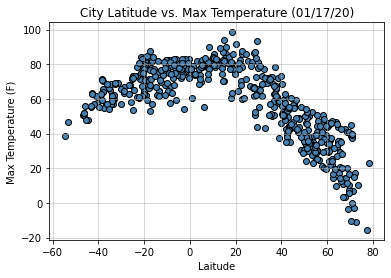

In [10]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Higher temperatures are oberved at or near 0 latitude and temperatures decreases the further latitude moves from 0.

## Latitude vs. Humidity Plot

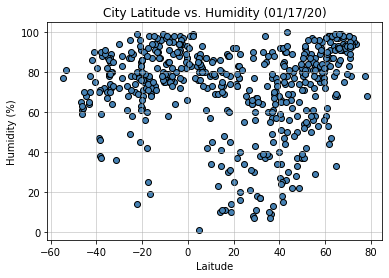

In [12]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

The chart represents the observations of humidity across cities (represented by their latitude). The representations appear to be relatively even with the exception that there are significantly fewer observations of humudity below 60% between the latitudes of -18 and 0 relative to the other latitudinal points.

## Latitude vs. Cloudiness Plot

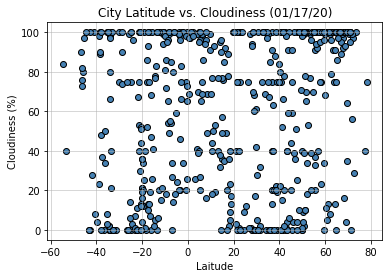

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Cloudiness data is widely spread across the latitudes.

## Latitude vs. Wind Speed Plot

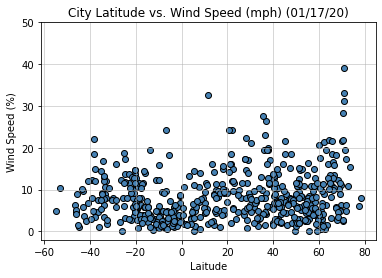

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

The chart represents the observations of wind speeds per city according to latitudes. The observations indicate that the highest speeds are around 70 mph and occur in the northern hemisphere at the 70th latitudinal point.

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8763230405983652


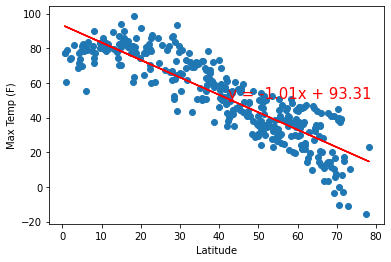

None


In [17]:
# Create Latitude vs. Temperature Plot scatter plot (Northern Hemisphere)

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

This chart represents the observations in the northern hemisphere of maximum temperatures recorded according the the latitude of the observation. The linear plot indicates higher maximum temperatures are observed closer to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6742264517320627


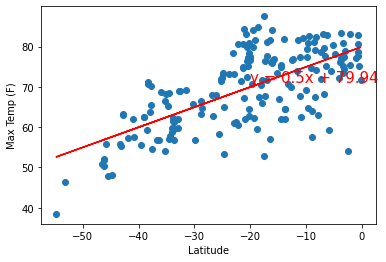

None


<Figure size 432x288 with 0 Axes>

In [20]:
# Create Latitude vs. Temperature Plot scatter plot (Southern Hemisphere)

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

This chart represents the observations in the southern hemisphere of maximum temperatures recorded according the the latitude of the observation. The linear plot indicates higher maximum temperatures are observed closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2721993245631466


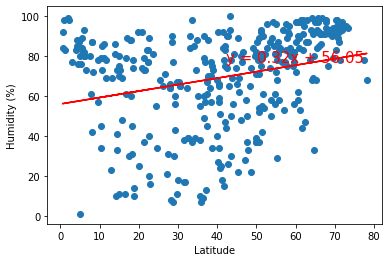

None


In [21]:
# Create Latitude vs. Humidity Plot scatter plot (Northern Hemisphere)
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

This chart represents the observation of humidity along latitudes in the northern hemisphere amd the linear plot indicates an increase in humidity the closer to the equater that the observation is recorded.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3241066473316678


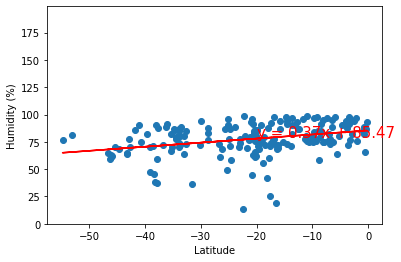

None


In [22]:
# Create Latitude vs. Humidity Plot scatter plot (Northern Hemisphere)
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

This chart represents the observation of humidity along latitudes in the southern hemisphere amd the linear plot indicates an increase in humidity the closer to the equater that the observation is recorded.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19690439277613997


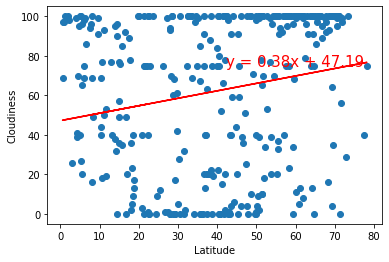

None


In [23]:
# Create Latitude vs. Cloudiness Plot scatter plot (Northern Hemisphere)
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

This chart represents the observations of cloudiness recorded in the Northern hemisphere according to latitude. The linear plot indicates higher observations of cloudiness closer to the equator however the variance is only slight.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12249952919748976


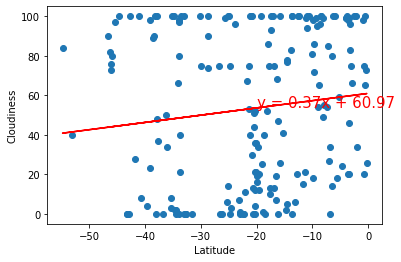

None


In [24]:
# Create Latitude vs. Cloudiness Plot scatter plot(Southern Hemisphere)
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

This chart represents the observations of cloudiness recorded in the southern hemisphere according to latitude. The linear plot indicates higher observations of cloudiness closer to the equator however the variance is only slight.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13447071954574835


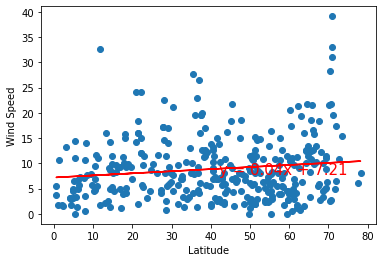

None


In [25]:
# Create Latitude vs. Wind Speed scatter plot (Northern Hemisphere)
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

This chart represents the observations of wind speed and latitude across the northern hemisphere. The linear plot indicates a moderate increase in wind speed the further north from the equator that the observation occurs.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24711895872158357


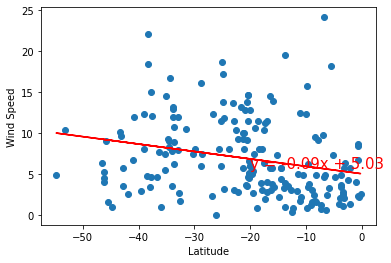

None


In [26]:
# Create Latitude vs. Wind Speed scatter plot (Northern Hemisphere)
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

This chart represents the observations of wind speed and latitude across the southern hemisphere. The linear plot indicates a moderate increase in wind speed the further south from the equator that the observation occurs.